# Final Gantt for _[The Necessity of an Additional $\gamma$-ray Transient Monitoring Mission](https://www.overleaf.com/project/67c600eae72c06e070b972df)_
Prelimiary plots as well as learning to make Gantt charts and searching the correct data (i.e. getting to know all $\gamma$-ray and X-ray mission in the last 30 years) can be found in another notebook named `GanttObservatories.ipynb`.

## Time-Energy Gantt Diagram

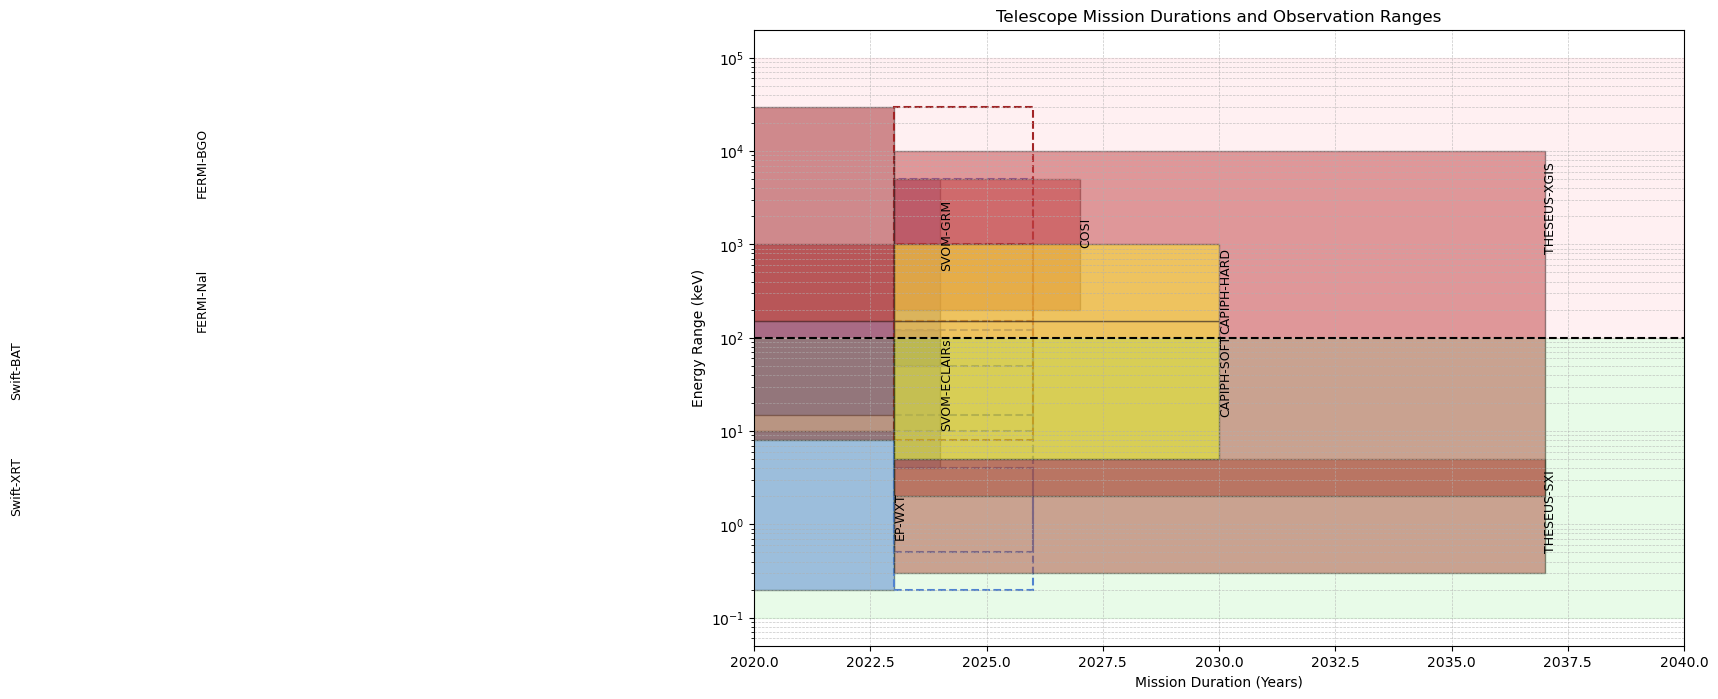

In [47]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define telescope data (including possible extensions)
telescopes = [
    # mission-instrument, (low_energy, high_energy), age, launch_year, extension_possible, mission_type, citation
    # energies in keV
    # X-ray
    ('Swift-BAT', (15, 150), 2004, 'y', 'current_xray', 'source'),
    ('Swift-XRT', (0.2, 10), 2004, 'y', 'current_xray', 'source'),
    ('SVOM-ECLAIRs', (4, 120), 2024, 'y', 'current_xray', 'source'),
    ('SVOM-GRM', (50, 5000), 2024, 'y', 'current_xray', 'source'),
    ('EP-WXT', (0.5, 4), 2023, 'y', 'current_xray', 'source'),

    # gamma-ray
    ('FERMI-Nal', (8, 1000), 2008, 'y', 'current_gamma', 'source'),
    ('FERMI-BGO', (150, 30000), 2008, 'y', 'current_gamma', 'source'),

    # future x-ray

    # future gamma-ray
    ('COSI', (200, 5000), 2027, 'n', 'future_gamma', 'source'),
    ('THESEUS-SXI', (0.3, 5), 2037, 'n', 'future_gamma', 'source'),
    ('THESEUS-XGIS', (2, 10000), 2037, 'n', 'future_gamma', 'source'),

    # CAPIPH
    ('CAPIPH-SOFT', (5, 150), 2030, 'n', 'capiph', 'alcaide-núñez 2025 inprep'),
    ('CAPIPH-HARD', (150, 1000), 2030, 'n', 'capiph', 'alcaide-núñez 2025 inprep'),
]

# Extract data
names = [t[0] for t in telescopes]
ranges = [t[1] for t in telescopes]
launch_years = [t[2] for t in telescopes]
lifetimes = [2023 - year for year in launch_years]  # Use current year (2023)
extensions = [t[3] for t in telescopes]
obstypes = [t[4] for t in telescopes]

# Compute end-of-mission years
end_years = [launch + lifetime for launch, lifetime in zip(launch_years, lifetimes)]

# Create plot
fig, ax = plt.subplots(figsize=(12, 8))

# Define colors
colors = {
    "current_xray": "royalblue",
    "future_xray": "cornflowerblue",
    "current_gamma": "darkred",
    "future_gamma": "firebrick",
    "capiph": "yellow"
}

# Plot mission lifetimes as rectangles
for i, (name, (start, end), launch, end_mission, ext, obstype) in enumerate(zip(names, ranges, launch_years, end_years, extensions, obstypes)):
    color = colors[obstype]  # Use the color based on the mission type

    # Main mission rectangle
    rect = patches.Rectangle((launch, start), end_mission - launch, end - start,
                             facecolor=color,
                             alpha=0.5, edgecolor="black", linewidth=1)
    ax.add_patch(rect)

    # Handle mission extensions
    ext_length = 0
    ext_style = {}
    if ext == 'y':  # Potential extension
        ext_length = 3
        ext_style = {'facecolor': 'none', 'edgecolor': color, 'linestyle': '--', 'linewidth': 1.5}  # Dashed outline

    if ext_length > 0:
        ext_rect = patches.Rectangle((end_mission, start), ext_length, end - start, **ext_style)
        ax.add_patch(ext_rect)

    # Add mission label
    ax.text(launch, (start + (end /  2)) / 2, name, ha="left", va="center", fontsize=9, color="black", rotation='vertical')

# Set axis labels and title
ax.set_xlabel("Mission Duration (Years)")
ax.set_ylabel("Energy Range (keV)")
ax.set_title("Telescope Mission Durations and Observation Ranges")

# Log scale for energy range
ax.set_yscale("log")

# Add X-ray/gamma-ray division
ax.axhline(y=100, color='black', linestyle='--')
ax.axhspan(ymin=0.1, ymax=100, color='lightgreen', alpha=0.2)
ax.axhspan(ymin=100, ymax=10**5, color='lightpink', alpha=0.2)

# Year range
ax.set_xlim(2020, 2040)

# Grid and style
ax.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)

# Show plot
plt.show()
fig.savefig('time_energy.png', dpi=600)









In order to perform intensity interferometry, we must have a fleet of gamma-ray/X-ray monitoring satellites online, covering different ranges of the high-energy electromagnetic spectrum. UNtil 2025 we did have:
* Swift
* Fermi
* INTEGRAL

However, INTEGRAL was shut down in March 2025, and both FERMI and Swift will face both aging and financial issues, continued observations are not granted. In the context of this panorama, space agencies are preparing future missions, these are:
* COSI
* THESEUS
* HERD

And some that were launched recently:
* SVOM
* Einstein Probe
* HERMES

The aim of CAPIBARA is to provide a further GRB monitoring satellite for the sake of intensity interferometry. Complying with this goal we are setting a dual observation range, where we will be covering both gamma-rays and X-rays and supporting the efforts of other teams and missions. Our proposed observation range is:
1. Gamma-ray detector with wide FoV: 1 MeV - 1000 MeV
2. X-ray detector with poiting accuracy < 5 arcsec: 0.1 - 1000 keV

Strategically, the goal of CPM (CAPIBARA Photonic Mission) is to fill in the observation gap between the HERD and the COSI missions, replacing the monitoring of FERMI and INTEGRAL. While also matching the observations of COSI with those of SVOM, HiZ-GUNDAM and Einstein Probe.

CPM comes accross as the observational stage between HERMES (a short CubeSat mission) and THESEUS (a mid-size mission by ESA in the 2030s). **But how special is CPM? How does it justify with the existance of HERMES?** With THESEUS is easier, because it is more far in the timeline.

High-z GRB are best observed in the 1 keV to 10 MeV region.

In [19]:
# only TRANSIENT observing missions

import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define telescope data (including extensions)
telescopes = [
    # name, (low_energy, high_energy), age, launch year, extension possibility
    # X-ray
    ('Swift', (0.2, 150), 26, 2004, 'y', 'current_xray'),
    ('NICER', (0.2, 12), 2, 2017, 'n', 'current_xray'),
    ('IXPE', (2, 8), 3, 2021, 'n', 'current_xray'),
    
    ('Einstein Probe', (0.5, 4), 5, 2023, 'y', 'current_xray'),
    ('SVOM', (4, 5000), 10, 2024, 'n', 'current_xray'), # has a GRB monitoring instrument in 15-5000 keV range
    
    # ('XL-Calibur', (15, 60), 2, 2022, 'n', 'current_xray'), #TODO: check
    # ('XRISM', (0.3, 12), 10, 2024.5, 'n', 'current_xray'), #TODO: check

    # current gamma-ray
    ('Fermi', (10, 300000000), 17, 2008, 'y', 'current_gamma'),

    #future X-ray
    ('HiZ-GUNDAM', (0.5, 4), 10, 2030, 'n', 'future_xray'), # also having a built-in IR follow-up telescope

    # ('eXTP', (2, 30), 2, 2027, 'n', 'future_xray'), #TODO: check

    # future gamma-ray
    # ('HERD', (10000000, 1000000000), 10, 2027, 'n', 'future_gamma'),
    
    ('THESEUS', (2, 20000), 3, 2037, 'n', 'future_gamma'), # this is also setted to observe @ X-ray (0.3-6 KeV) and Infrared (see THESEUS FU)
    ('THESEUS FU', (0.3, 6), 3, 2037, 'n', 'future_xray'),
    ('HERMES', (3, 500), 2, 2025, 'n', 'future_gamma'),

    # ('COSI', (200, 10000), 10, 2027, 'n', 'future_gamma'),  #TODO: check

    # CAPIBARA
    # ('CAPIBARA', (1, 10000000), 10, 2026, 'n', 'diamant')
    # ('CPM', (10000, 10**8), 10, 2026, 'n', 'diamant'),
    # ('CPM FU', (0.5, 1000), 10, 2026, 'n', 'diamant')
]

latex_telescopes = [
    # name, (low_energy, high_energy), age, launch year, extension possibility
    # X-ray
    ('Swift', (0.3, 150), 26, 2004, 'n', 'current_xray'),
    ('XRISM', (0.3, 12), 5, 2023, 'n', 'current_xray'),
    ('Einstein Probe', (0.5, 10), 5, 2024, 'n', 'current_xray'),
    ('SVOM', (0.2, 5000), 5, 2024, 'n', 'current_xray'),
    ('Fermi', (8, 300000), 17, 2008, 'n', 'current_gamma'),
    ('NICER', (0.2, 12), 8, 2017, 'n', 'current_xray'),
    ('HERMES', (2, 2000), 5, 2024, 'n', 'current_gamma'),
    
    ('STAR-X', (0.2, 6), 5, 2028, 'n', 'future_xray'),
    ('THESEUS', (0.3, 10000000), 5, 2032, 'n', 'future_gamma'),
]

latex_telescopes = [
    # name, (low_energy, high_energy), age, launch year, extension possibility
    # X-ray
    #('Swift', (0.3, 150), 26, 2004, 'y', 'current_xray'),
    ('IXPE', (2, 8), 3, 2021, 'y', 'current_xray'),
    ('XRISM', (0.3, 12), 0, 2023, 'y', 'current_xray'),
    ('Einstein Probe', (0.5, 10), 0, 2024, 'y', 'current_xray'),
    ('SVOM', (0.2, 5000), 0, 2024, 'y', 'current_xray'),
    #('Fermi', (8, 300000), 17, 2008, 'y', 'current_gamma'),
    #('NICER', (0.2, 12), 8, 2017, 'y', 'current_xray'),
    ('HERMES', (2, 2000), 0, 2024, 'y', 'current_gamma'),
    
    ('STAR-X', (0.2, 6), 0, 2028, 'y', 'future_xray'),
    ('THESEUS', (0.3, 20000000), 0, 2032, 'y', 'future_gamma'),
    
    # Upcoming High-Energy Missions
    #('Daksha', (1, 1000000), 5, 2026, 'n', 'ISRO; aims to detect electromagnetic counterparts to gravitational wave events and study GRBs.'),
    ('MoonBEAM', (1, 12), 5, 2027, 'n', 'NASA; designed for high-sensitivity all-sky monitoring of high-energy transients.'),
    ('CATCH', (1, 12), 5, 2028, 'n', 'International Consortium; proposes a constellation of over 100 small satellites to monitor X-ray transients.'),
    ('GECAM-C', (6, 5), 5, 2029, 'n', 'CAS; aims to detect and localize high-energy transients like GRBs.'),
    ('HiZ-GUNDAM', (1, 12), 5, 2030, 'n', 'JAXA; designed to detect high-redshift GRBs to study the early universe.'),
    ('THESEUS', (0.3, 20), 5, 2031, 'n', 'ESA; aims to detect and characterize GRBs across cosmic history.'),
]

# Extract data
names = [t[0] for t in latex_telescopes]
ranges = [t[1] for t in latex_telescopes]
lifetimes = [t[2] for t in latex_telescopes]
launch_years = [t[3] for t in latex_telescopes]
extensions = [t[4] for t in latex_telescopes]  # Default 'n' if missing
obstypes = [t[5] for t in latex_telescopes]

# Compute end-of-mission years
end_years = [launch + lifetime for launch, lifetime in zip(launch_years, lifetimes)]

# Create plot
fig, ax = plt.subplots(figsize=(12, 8))

# Define colors
colors = {
    "current_xray": "royalblue",
    "future_xray": "cornflowerblue",
    "current_gamma": "darkred",
    "future_gamma": "firebrick",
    "diamant": "yellow"
}

# Plot mission lifetimes as rectanges
for i, (name, (start, end), launch, end_mission, ext, obstype) in enumerate(zip(names, ranges, launch_years, end_years, extensions, obstypes)):    
    color = colors["current_xray"] if start < 10 else colors["current_gamma"]
    if launch > 2024:
        color = colors["future_xray"] if start < 10 else colors["future_gamma"]

    # Main mission rectangle
    rect = patches.Rectangle((launch, start), end_mission - launch, end - start, 
                             facecolor=colors[obstype],
                             alpha=0.5, edgecolor="black", linewidth=1)
    ax.add_patch(rect)

    # Handle mission extensions
    ext_length = 0
    if ext == 'y': # Potential extension
        ext_length = 3
        ext_style = {'facecolor': 'none', 'edgecolor': color, 'linestyle': '--', 'linewidth': 1.5}  # Dashed outline
    
    if ext_length > 0:
        ext_rect = patches.Rectangle((end_mission, start), ext_length, end - start, **ext_style)
        ax.add_patch(ext_rect)

    # Add mission label
    # ax.text(launch, (start+(end/2))/2, name, ha="left", va="center", fontsize=9, color="black", rotation='vertical')
    if 'current' in obstype:
        ax.text(end_mission, end+end/5, name, ha="right", va="center", fontsize=9, color="black", rotation='horizontal')
    else:
        ax.text(launch, end+end/5, name, ha="left", va="center", fontsize=9, color="black", rotation='horizontal')

# Set axis labels and title
ax.set_xlabel("Mission Duration (Years)")
ax.set_ylabel("Energy Range (keV)")
ax.set_title("Telescope Mission Durations and Observation Ranges")

# Log scale for energy range
ax.set_yscale("log")

# Add X-ray/gamma-ray division
ax.axhline(y=100, color='black', linestyle='--')
ax.axhspan(ymin=0.1, ymax=100, color='lightgreen', alpha=0.2)
#ax.axhspan(ymin=100, ymax=10000000000, color='lightpink', alpha=0.2)

# Year range
# ax.set_xlim(min(launch_years) - 2, max(end_years) + 10)

# Grid and style
ax.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.5)

# Show plot
plt.show()
fig.savefig('time_energy.png', dpi=600)

KeyError: 'NASA; designed for high-sensitivity all-sky monitoring of high-energy transients.'

ValueError: Image size of 1889869x1899098162 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1200x800 with 1 Axes>

$
\title{The Necessity of an Additional $\gamma$-ray throught X-ray Transient Observing Mission}

\begin{abstract}
\comment{It would be great to incorporate real calculation of the GRB or \gr-transient observation per year, and the combination with GW and neutrino detections.}
\comment{Surveys like LSST will provide key information for GRB optical afterglow observations; but will it be possible?, because rubin will return to the same spot every few night, whereas afterglow last for minutes or hours}
\textcolor{orange}{The perfect observation range for the study of GRB as cosmological probes is 1 keV to 10 MeV}
\textcolor{red}{The CAPIBARA Photonic Mission (CPM) will cover the following observations ranges: $10-1000$ MeV and $0.5-1000$ GeV}
\end{abstract}

\keywords{\uat{High Energy Astrophysics}{739} -- \uat{Gamma-Ray Astronomy}{628} --- \uat{Gamma-ray Telescope}{634} --- \uat{Very Long Baseline Interferometry}{1769}}

\section{Introduction}
High-energy astrophysics has very important mysteries to unfold and, since the discovery of the first Gamma-ray Bursts (GRBs) in the 1960s, these have become more and more studied. GRB are the most powerful explosions in the Universe \citep{missing} and are key stone of the high-energy astrophysics research.

Despite the intense study of these high-energy events \citep{missing}, there are many important mysteries to unfold: the nature of high-energy transients \citep{gompertz2023case} \citep{ravasio2024mega}, the equation of state (EOS) of compact objects \citep{ji2025equationstateneutronstars}, \citep{qiumu2025kilonovaemissionneutronstar}, particle acceleration mechanisms \citep{miroshnichenko2012particle}, among many other interrogations. Furthermore, there has been research developed on the use of GRBs as cosmological probes (i.e. very long distance standard candles up to $z \sim 9$) for the study of the expansion of the Universe and dark energy \citep{amati2002intrinsic}, \citep{Dainotti_2017} \citep{abdalla2022cosmology}, \citep{dainotti2023gamma}. \gr and X-ray observation play a central role in this exploration, enabling the study of the Universe, the testing of models and development of theories.

Telescopes are used to observe the high-energy Universe and provide reliable and complete datasets, including afterglows in lower energy ranges \citep{MiceliNavaAfterglow2022}. Neither \gr nor X-ray radiation do penetrate Earth's atmosphere \citep{schonfelder2013universe}, thus making high-energy astrophysics only feasible via space-based observatories \citep{bradt1992x}. \citep{spitzer1946astronomical}. It is true that very high energy (VHE) \gr and ultra high energy (UHE) cosmic rays (ionic particles) can be detected using ground-based Cherenkov telescopes, detecting the particle showers \citep{missing}. However, the electromagnetic radiation emitted by high-energy astrophysical transients does not fall within this energy range. However, it is interesting to study the possible to detect counterpart emission in other messengers such as neutrinos \citep{missing} and gravitational waves \citep{missing}, which can be detected on Earth indeed.
$$
\gr, and also X-ray to a lesser extent, are extremely hard to focus. \textit{Intensity interferometry} comes across as a method to combine the observed information from various telescopes (i.e. various satellites) to contraint the sky coordinates of GRBs. This is done by comparing the different times of arrival (ToA) of a transient signal of a given intensity among different telescopes placed at a baseline distance $D$. The angular resolution of the computed transient coordinates $\theta$ can be approximated by:
\begin{equation}
    \theta \approx \frac{c\delta t}{D}
\end{equation}

Where $\delta t$ is the differential between ToA and $c$ the light speed. This method not only enable preciser source localization, but also easier host galaxy identification and hence further host environment studies and redshift measurements. In order to employ intensity interferomtry a fleet of \gr/X-ray telescope is needed online, strategically covering different ranges of the high-energy spectrum.

From the early 2000s there are two major missions still active: Swift \citep{missing} and FERMI \citep{missing}. These have the biggest observation ranges in terms of energy. During the 2010s only NICER \citep{missing} was launched in the X-ray realm. This telescope observes only soft X-ray transients. Finally, after the 2020s there was a boom in X-ray telescope missions. With the launch of XRISM \citep{missing}, Einstein Probe (EP) \citep{missing} and SVOM \citep{missing}. The HERMES missions was recently launched (March 2025).

Until 2025 there were 3 big missions covering the \gr regime: ESA's INTEGRAL and NASA's Swift and Fermi. However, INTEGRAL was shut down in March 2025, finalizing its mission near 23 years after launch. While Swift and Swift, launched 2004 and 2008 respectively, are or will soon face aging and financial issues, continued high-quality observations are not granted.

In this context, national and international space agencies have taken action, with new missions in the X-ray range having been launched recently and future \gr mission proposed. I outline these missions in sections \ref{sec:launched_missions} and \ref{sec:proposed_missions}, and outline the curent prospects of high-energy (\gr and X-ray) astrophysics in terms of available observatories in section \ref{sec:status}. Considering the evaluation, I present the \cpm mission in section \ref{sec:cpm} and elaborating on its goals and specifications, and extracting conclusions for its characteristics.

\begin{figure*}[]
    \centering
    \includegraphics[width=0.5\linewidth]{figs/Atmospheric_electromagnetic_transmittance_or_opacity.jpg}
    \caption{Atmospheric opacity by wavelength (credit: NASA, Public Domain via Commons)}
    \label{fig:atmospheric_opacity}
\end{figure*}

\section{The Current Landspace of \gr and X-ray Space Telescopes}\label{sec:missions}

\begin{table*}
    \centering
    \caption{Current status of high-energy transient monitoring space missions. Note that INTEGRAL isn't included since it terminated its mission in February 2025 \citep{integralend2025}. Take also into account that this is a list of transient observing high-energy telescopes, not all high-energy telescopes.}
    \begin{tabular}{@{}llp{1.5cm}p{3cm}p{8cm}@{}}
        \toprule
        \textbf{Mission} & \textbf{Launch} & \textbf{Energy Range} & \textbf{Estimated\newline Lifetime} & \textbf{Key Capabilities} \\ \toprule
        \textbf{X-ray} & & & & \\  \midrule
        Swift & Nov 2004 & footnote\footnote{15--150 keV (BAT), 0.3--10 keV (XRT), 170--650 nm (UVOT)} & since 2004 & Rapid GRB detection \& multi-wavelength follow-up \\ \midrule
        NICER & Jun 2017 & 0.2--12 keV & since 2017 & Soft X-ray timing and spectroscopy, focusing on neutron stars. \\ \midrule
        XRISM & Sep 2023 & 0.3--12 keV & 3 years (extendable) & High-resolution X-ray spectroscopy \\ \midrule
        EP & Jan 2024 & 0.5--10 keV & 3 years (extendable to 5) & Wide-field X-ray monitoring with lobster-eye optics \\ \midrule
        SVOM & Jun 2024 & footnote\footnote{4--150 keV (ECLAIRs), 15--5000 keV (GRM), 0.2--10 keV (MXT), 400--950 nm (VT)} & TBD & Multi-wavelength observations of GRBs and other transients. \\ \bottomrule
        \textbf{Gamma-ray} & & & & \\ \midrule
        Fermi & Jun 2008 & 8 keV--300 GeV & since 2008 & All-sky gamma-ray monitoring \\ \midrule
        HERMES & March 2025 & 2 keV--2 MeV & 2 years & NanoSat constellation for HE transient detection \\ \bottomrule
        \textbf{Future} & & & & \\ \midrule
        STAR-X & July 2028 & footnote\footnote{0.2--6 keV (XRT), 165--300 nm (UVT)} & TBD & Time-domain surveys and transient event rapid response \\ \midrule
        THESEUS & 2032 & 0.3 keV--10 MeV & TBD & Detection and characterization of high-energy transients \\ \bottomrule
    \end{tabular}
\end{table*}

\begin{table*}[h]
    \centering
    \caption{Overview of Upcoming High-Energy Missions}
    \begin{tabular}{@{}llp{3cm}p{3cm}p{5cm}@{}}
        \toprule
        \textbf{Mission} & \textbf{Agency / Lead} & \textbf{Launch Date (Planned)} & \textbf{Energy Range} & \textbf{Key Capabilities} \\ \midrule
        Daksha & ISRO & TBD & 1 keV – 1 MeV & Comprises two satellites for all-sky monitoring; aims to detect electromagnetic counterparts to gravitational wave events and study gamma-ray bursts (GRBs). \\
        MoonBEAM & NASA & TBD & Gamma-ray (specific range TBD) & A 3-year mission in cislunar orbit designed for high-sensitivity all-sky monitoring of high-energy transients, including GRBs and magnetar flares. \\
        CATCH & International Consortium & TBD & X-ray (specific range TBD) & Proposes a constellation of over 100 small satellites to monitor X-ray transients across the sky. \\
        GECAM-C & CAS & TBD & 6 keV – 5 MeV & Successor to GECAM-A/B missions; aims to detect and localize high-energy transients like GRBs. \\
        HiZ-GUNDAM & JAXA & Late 2020s (proposed) & X-ray and Near-Infrared (specific ranges TBD) & Designed to detect high-redshift GRBs to study the early universe; equipped with wide-field X-ray detectors and a near-infrared telescope. \\
        THESEUS & ESA & Early 2030s (proposed) & 0.3 keV – 20 MeV & Aims to detect and characterize GRBs across cosmic history, contributing to multi-messenger and time-domain astrophysics. \\ \bottomrule
    \end{tabular}
\end{table*}


\subsection{Recently Launched Missions}\label{sec:launched_missions}
\subsection{HERMES}


HERMES-SP (High Energy Rapid Modular Ensemble of Satellites – Scientific Pathfinder) is a mission concept based on a constellation of nano-satellites in low Earth orbit (LEO), hosting new miniaturized detectors to probe the X-ray temporal emission of bright high-energy transients such as Gamma-Ray Bursts (GRB) and the electromagnetic counterparts of Gravitational Wave Events (GWE) – hence playing a pivotal role in multi-messenger Astrophysics of the next decade.

HERMES-SP goal is to design and implement the first Gamma-Ray Burst localisation experiment through a distributed space architecture realized by a 3+3 CubeSat federation. Each CubeSat will be equipped with a novel miniaturised detector to gain a wide deep space coverage, and demonstrate capabilities in precisely localising GRB events in space.

11 partners from 5 European countries form the HERMES-SP Consortium, under the scientific coordination of Dr. Fabrizio Fiore. HERMES-SP has received funding from the European Union’s Horizon 2020 research and innovation programme under Grant Agreement No 821896, and exploits synergies with an ongoing project funded by Agenzia Spaziale Italiana (ASI).

\subsection{SVOM}

\subsection{Einstein Probe}

\subsection{Proposed Future Missions}\label{sec:proposed_missions}
Text

\subsection{HERD}
HERD (High Energy Cosmic Radiation Detection Facility) is a module to be installed on the China's Space Station (CSS) upon its launch not earlier than 2027. The main objectives of HERD are to detect dark matter (DM) with an unprecedented sensitivity; deriving the spectrum and composition of cosmic rays (CRs)\footnote{mass-particles at very high speeds} at energies up to $1$ $PeV$, which origins are unknown; and to monitor high-energy \gr with a wide field of view \cite{herd_website}. This instrument is open to substitution, repairs, and upgrades during its expected 10 year lifetime on the CSS \citep{herd_ieec}. In terms of \gr observation, HERD will cover wavelengths ranging from $1$ $GeV$ to $10^3$ $GeV$ \citep{herd_gamma}. The HERD mission is a collaboration between international agencies and research centers lead by the Institute of High Energy Physics (IHEP) of the Chinese Academy of Sciences (CAS).

\subsection{COSI}
The COSI (Compton Spectrometer and Imager) mission is a \gr survey telescope designed to probe the origins of Galactic positrons, uncover the sites of nucleosynthesis in the Galaxy, perform pioneering studies of \gr polarization, and find couterparts to multi-messenger sources \citep{cosi_website}. It will cover the soft \gr range between $0.2$ $MeV$ and $5$ $MeV$. COSI combines improvements in sensitivity, spectral resolution, angular resolution, and sky coverage to contribute to the \gr astrophysics field. The space telescope is currently scheduled for launch in 2027. The COSI mission is developed by the University of California, Berkeley's Space Sciences Laboratory; the University of California, San Diego; the Naval Research Laboratory, NASA's Goddard Space Flight Center, and Northrop Grumman.

\subsection{THESEUS}
The Transient High Energy Sky and Early Universe Surveyor (THESEUS) is a mission concept selected by ESA for launch in 2032. It is designed to increase the discovery space of the high energy transient phenomena over the cosmic history. Addressing open questions about the Early Universe and multi-messenger interferometry. It's main goals are deep sky monitoring in a broad energy band (0.3keV - 20 MeV), leveraging focusing capabilities and high angular resolution in the soft X-ray band, and on board near-IR capabilities for immediate transient identification and redshift determination. \citep{Amati_2018} \citep{amati_2021}. THESEUS is a mission coordinated by the Istituto Nazionale di Astrofisica (INAF-OAS) at Bologna, Leicester University, Commissariat à l'énergie atomique at the University of Saclay, the Institut für Astronomie und Astrophysik Tübingen, and the University of Geneva.
\comment{It is very important to emphasize, what missions are ready for launch/tuning in soon, or are concepts studied for launch in the >2030 era}



\subsection{HiZ-GUNDAM}
The High-z Gamma-ray bursts for Unraveling the Dark Ages Mission (HiZ-GUNDAM) is a mission that will search for evidence of the first generation of stars (also population I stars) through the detection of gamma-ray burst (GRB) afterglows in the ancient Universe ($z > 7$). The mission will also contribute to multi-messenger astronomy comparing the X-ray and Infrared (IR) observations of neutron star (NS) mergers with gravitational wave data \citep{isas_website}. HiZ-GUNDAM will feature a wide-field X-ray detector to capture GRB phenomena as well as an infrared telescope to quickly observe the afterglow and measure the redshift of the corresponding celestial body. The wide-field X-ray detector of HiZ-GUNDAM should cover an energy range between $0.1$ and $150$ $keV$ HiZ-GUNDAM the Japanese Aerospace Exploration Agency (JAXA) and the Institute of Space and Astronautical Science (ISAS).


\subsection{GAMOW Mission}


\subsection{Comments}
\textit{Recently, the vast majority of telescopes are addressing observation in near-optical wavelengths, which we deeply appreciate. For instance, the James Webb Space Telescope (JWST) in the Near and Mid-infrared (NIR \& MIR), see table 9 of \cite{Gardner_2006}\citep{jwst_instrumentation}; the Euclid Space Telescope in the optical \citep{euclidvisinstrument2024} and NIR \citep{euclidnispinstrument2024}; Vera C. Rubin Observatory in the UV, optical, and NIR \citep{oconnor2019uniformity}; and the Nancy Grace Roman Space Telescope coming in the future for the visible and NIR \citep{roman}.

This is good, as they will provide a very comprehensive all-sky transient coverage in the optical and infrared ranges. However, the high-energy range of the is less curated. The major \gr telescopes have more than 15 years, as with the X-ray telescopes, as some of them have 20+ years and are facing funding issues (see table \ref{tab:age}. The increases in age poses also increases in the risk of instrument malfunction and decreases in data quality\footnote{Comparing the once launched instruments with today's technological possibilities}. In the future, this will create an observational gap, not satisfying the demand of high-energy astrophysics observations required for multi-wavelength and multi-messenger astrophysics.}

\section{High-energy observations prospects \& the CAPIBARA missions}




\begin{table*}[]
    \centering
    \begin{tabular}{c|c|c}
        Telescope Name & Observation Range ($keV$) & science goals \\ \hline
        CAPIBARA & $1-10,000$ $MeV$ & GRB, AGN, SNR \\
        HERD & $1,000,000 - 1000,000,000$ $MeV$ & DM, CRs \\
        COSI & $0.2-5$ $MeV$ & Galactic positrons, nucleosynthesis, \gr polarization, multi-messenger \\
        THESEUS & & \\ \hline
        HiZ-GUNDAM & $0.1-150$ $keV$ & Population I stars, GRB afterglows, multi-messenger\\
        AXIS & $0.3-10$ $keV$& SMBH evolution, galactic feedback, AGN, stellar activity, SNe progetinors and remnants,  \\
        NewAthena & $0.1-12$ $keV$ & SMBH-galaxies, NS, intergalactic plasma large-scale structure, metals, star-planet \\
        HERMES (INAF) & & \\
    \end{tabular}
    \caption{Summary of the current state of high-energy space telescopes.}
    \label{tab:summary}
\end{table*}

In summary, although the current \gr space telescopes are getting older, new missions and ideas arise to fill in those observation gaps. In the X-ray regime, observatories have launched in recent years, however, there are also promising mission scheduled for the next decade. However, the high-energy range will not be completely observable.

\begin{figure*}
    \centering
    \includegraphics[width=0.75\linewidth]{figs/time-energy.png}
    \caption{Time (years) - Energy ($keV$) plot of current and future X-ray and \gr telescopes. The color-code is blue for mainly X-ray telescopes, and red for mainly \gr telescopes. Additionally, the X-ray range is colored green and the \gr on red. Highlighted in yellow are the observational ranges of the CAPIBARA missions. Note that timelines in the future are all set to 10 years of mission duration up to 2040. Possible mission extensions are represented by dashed lines.}
    \label{fig:time-energy}
\end{figure*}

As seen in fig. \ref{fig:time-energy}, once the new generation of high-energy telescopes (outlined in section \ref{sec:future}), there will remain an observation gap between approximately $10^4$ and $5\times10^7$ $keV$. This is now covered by the INTEGRAL and FERMI space telescopes. However, in the coming years they will, if not terminate their missions, become unprecise compared with new observation from HERD or COSI. That range should be observed by the CAPIBARA mission\gr instrument.

CAPIBARA (Collaboration for the Analysis of Photonic and Ionic Bursts and Radiation from Barcelona) \citep{capibara-website} is a group of high-school students, support by different institutions, aiming to launch a satellite for the high-energy cosmos. We want to explore the high energies in both its ionic (cosmic rays) states and photonic (\gr and X-ray).

Inside the collaboration, our focus will be in the standardization of gamma-ray bursts (GRBs) for cosmology, the study of \gr and X-ray emissions in supernova remnants (SNR) and active galactic nuclei (AGN), and solar cosmic rays. However, we wlil make all of our data and observationa publicly available for anyone to conduct their research. Furthermore, transient detections will be notified in real time through the General Coordinates Network (GCN) \citep{gcn-website}, \citep{2024AAS...24335919S}. CAPIBARA will observe in an energy range of $10^4$ to $10^8$ $keV$ as well as between $0.X$ to $10^2$ $keV$ for afterglow and lower energy transients observations (currently covered by the 26-year-old SWIFT observatory).

The CAPIBARA mission will contribute to the decadal survey's goals to promote multi-wavelength and multi-messenger astrophysics \citep{NAP26933}. Multi-wavelength because it will observe a precise, neglected, energy range in the \gr spectra, filling the observational gap and providing complementing observations with those of other high-energy and lower energy telescopes. Multi-messenger because it will observe the light of very high energy astrophysical phenomena, which also generate gravitational waves. Providing electromagnetic observations for events detected by LIGO, VIRGO, KAGRA, and LISA.

In Addition, the CAPIBARA missions will enable \gr space interferometry. \gr are a highly penetrating radiation and cannot be focused using conventional mirrors or telescopic techniques. In the last decades there have been multiple techniques developed to pinpoint the origin of observed \gr like Compton detectors or Pair Production detectors \citep{2022hxga.book...54T}. However, the most precise method for source localization is intensity interferometry. This technique uses time-of-arrival (ToA) differences for different telescopes to have better angular resolution (up to nanoarcsecond resolution). As wavefront normalization is not feasible for \gr, due to their extremely short wavelength, we employ energy intensity (flux) to compare the ToA differences for different observatories and thus compute localize the gamma-ray source with angular resolution in the order to nanoarcseconds.

\section{Conclusion}


\section*{Acknowledgements}
This paper is part of the study of concept and elaboration of a high-energy mission by the Collaboration for the Analysis of Photonic and Ionic Bursts and Radiation from Barcelona (CAPIBARA)\footnote{\href{https://capibara3.github.io}{capibara3.github.io}}, a research and engineering collaboration lead by high school students.

\begin{contribution}

All authors contributed equally to the Terra Mater collaboration.


\end{contribution}
\facilities{HST(STIS), Swift(XRT and UVOT), AAVSO, CTIO:1.3m, CTIO:1.5m, CXO}
\software{astropy \citep{2013A&A...558A..33A,2018AJ....156..123A,2022ApJ...935..167A},  
          Cloudy \citep{2013RMxAA..49..137F}, 
          Source Extractor \citep{1996A&AS..117..393B}
          }

\bibliography{sample7}{}
\bibliographystyle{aasjournal}

\end{document}
$